In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the dataset
df = pd.read_csv('haberman.csv')
print(df)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


In [3]:
#Summary about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


### Observation

* Since there are no misssing value there is no need for imputation
* Status column is integer value that needs to be covnerted into categorical value i.e "Yes" or "No"

In [20]:
#Replacing the status column with a meaningful data
df.loc[df.status == 1,'status'] = 'yes'
df.loc[df.status == 2,'status'] = 'no'
print(df.info)

<bound method DataFrame.info of      age  year  nodes status
0     30    64      1    yes
1     30    62      3    yes
2     30    65      0    yes
3     31    59      2    yes
4     31    65      4    yes
..   ...   ...    ...    ...
301   75    62      1    yes
302   76    67      0    yes
303   77    65      3    yes
304   78    65      1     no
305   83    58      2     no

[306 rows x 4 columns]>


In [21]:
#Getting statistics about dataset
df.describe()

#Status count
print((df.iloc[:,-1].value_counts()))

yes    225
no      81
Name: status, dtype: int64


### Observation

* Even though the max positive nodes are 52 , we can observe that 75% of patients only have 5 positive nodes
* Since there are 255 yes and 81 no , we can observe that the data is imbalanced

# Analysis

C:\Users\Abdul Azim\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


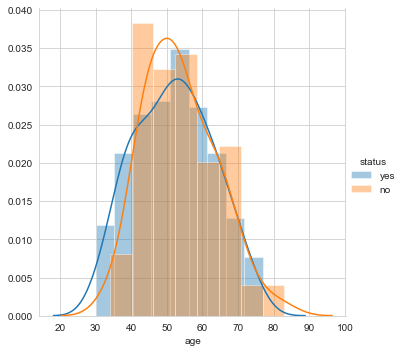

In [28]:
#Probability density function is a function that gives the probability that a random variable has a value x.
sns.FacetGrid(df, hue="status",size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

C:\Users\Abdul Azim\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


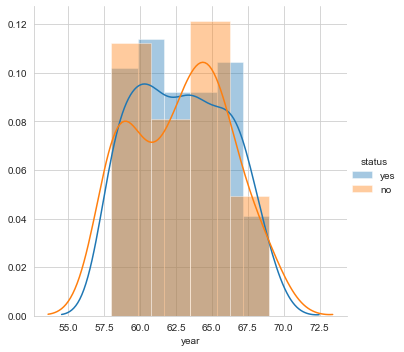

In [29]:
sns.FacetGrid(df, hue="status",size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

C:\Users\Abdul Azim\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


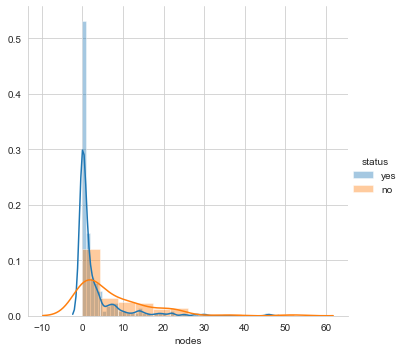

In [30]:
sns.FacetGrid(df, hue="status",size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

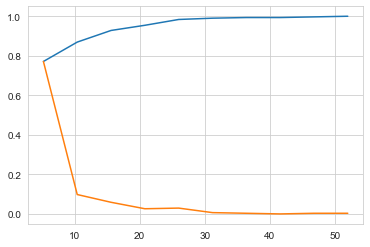

In [32]:
# The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.
counts, bin_edges = np.histogram(df['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.plot(bin_edges[1:],pdf)
plt.show();

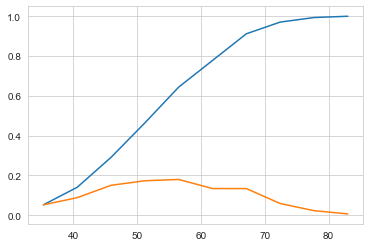

In [33]:
counts, bin_edges = np.histogram(df['age'], bins=10,density = True)
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.plot(bin_edges[1:],pdf)
plt.show();

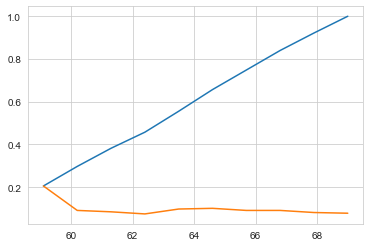

In [35]:
counts, bin_edges = np.histogram(df['year'], bins=10,density = True)
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.plot(bin_edges[1:],pdf)
plt.show();

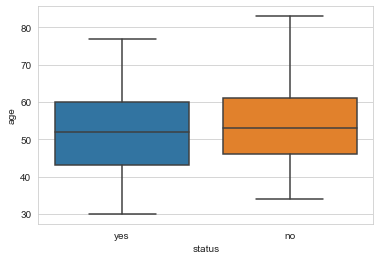

In [36]:
#Box Plots
sns.boxplot(x='status',y='age', data=df)
plt.show()

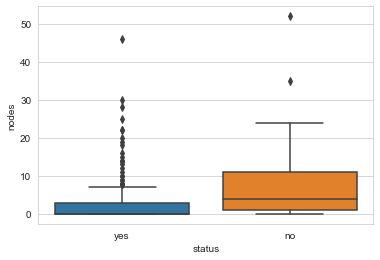

In [37]:
#Box Plots
sns.boxplot(x='status',y='nodes', data=df)
plt.show()

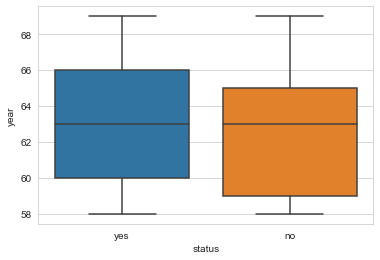

In [38]:
#Box Plots
sns.boxplot(x='status',y='year', data=df)
plt.show()

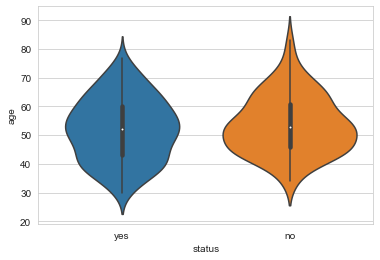

In [39]:
#Violin Plot
sns.violinplot(x="status", y="age", data=df, size=5)
plt.show()

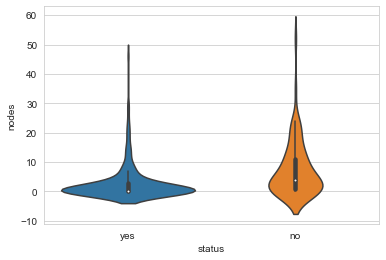

In [41]:
sns.violinplot(x="status", y="nodes", data=df, size=5)
plt.show()

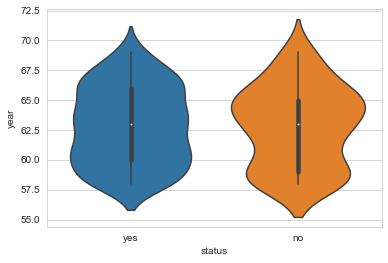

In [42]:
sns.violinplot(x="status", y="year", data=df, size=5)
plt.show()

C:\Users\Abdul Azim\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


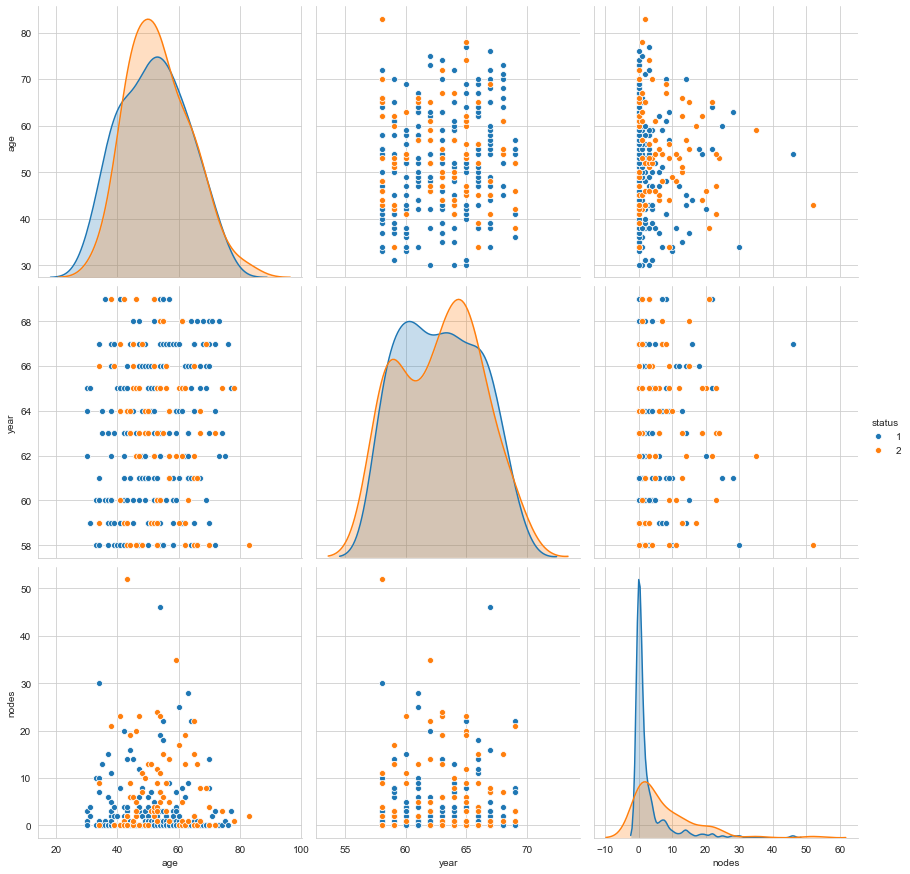

In [70]:
#3-D Pair Plot
sns.pairplot(df, hue="status",size=4);
plt.show()

## Observation

* We can see that almost 80% of the patients have only 0-5 positive lymph nodes (PDF and CDF of Nodes).
* Patients treated after 1966 have a slighter higher chance surviving compared to the rest (Box Plot of Years).
